In [1]:
import xarray as xr
from netCDF4 import Dataset
import rasterio as rio

In [2]:
dataset_path = 'RDEFT4_20200515.nc'

In [3]:
nc_ds = Dataset(dataset_path)
print(nc_ds)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Title: CryoSat-2 sea ice thickness and ancillary data
    Abstract: This data set contains monthly averaged Arctic sea ice thickness estimates and ancillary data. The primary data set used in the production of these data come from the ESA CryoSat-2 satellite. Sea ice freeboard is determined from CryoSat-2 using the method described in the Reference section below. In brief, this method uses a physical model to determine the best fit to each CryoSat-2 waveform.The fitted waveform is used to determine the retracking correction and also allows determination of the surface roughness within the footprint. For sea ice floes, the dominant backscattering layer is taken to be from the sea ice surface and thus sea ice freeboard is here defined as the height of the ice layer above the local sea surface. The DTU10 MSS is subtracted from each elevation measurement and the elevations from leads and se

In [8]:
nc_var = nc_ds['sea_ice_thickness']
print(nc_var)

<class 'netCDF4._netCDF4.Variable'>
float32 sea_ice_thickness(y, x)
    units: Meters
    long_name: Sea ice thickness
unlimited dimensions: 
current shape = (448, 304)
filling on, default _FillValue of 9.969209968386869e+36 used


In [10]:
nc_data = nc_var[:]
print(nc_data)

[[-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 ...
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]]


In [11]:
from matplotlib import pyplot as plt
%matplotlib inline

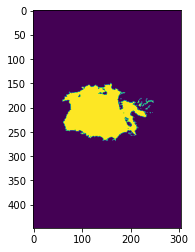

In [12]:
plt.imshow(nc_data)

In [14]:
xr_ds = xr.open_dataset(dataset_path)
print(xr_ds)

<xarray.Dataset>
Dimensions:            (x: 304, y: 448)
Dimensions without coordinates: x, y
Data variables:
    sea_ice_thickness  (y, x) float32 ...
    snow_depth         (y, x) float32 ...
    snow_density       (y, x) float32 ...
    lat                (y, x) float32 ...
    lon                (y, x) float32 ...
    freeboard          (y, x) float32 ...
    roughness          (y, x) float32 ...
    ice_con            (y, x) float32 ...
Attributes:
    Title:        CryoSat-2 sea ice thickness and ancillary data
    Abstract:     This data set contains monthly averaged Arctic sea ice thic...
    Projection:   CryoSat-2 elevation data have a nominal footprint size of 3...
    Institution:  NASA Goddard Space Flight Center
    PI_name:      For questions related to this data set please contact the P...
    References:   A description of the primary methodology used in the retrie...


In [15]:
xr_ds.sea_ice_thickness

<xarray.DataArray 'sea_ice_thickness' (y: 448, x: 304)>
[136192 values with dtype=float32]
Dimensions without coordinates: y, x
Attributes:
    units:      Meters
    long_name:  Sea ice thickness

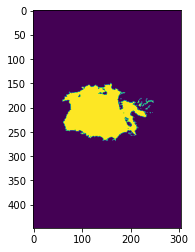

In [17]:
plt.imshow(xr_ds.sea_ice_thickness)

In [18]:
import numpy as np

In [31]:
# land mask from here: ftp://sidads.colorado.edu/pub/DATASETS/brightness-temperatures/polar-stereo/tools/masks/
land_mask = np.fromfile('gsfc_25n.msk', dtype=np.byte).reshape((448, 304))

In [27]:
np.unique(land_mask)

array([0, 1], dtype=int8)

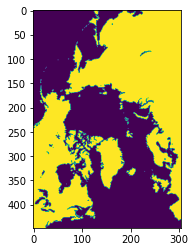

In [30]:
plt.imshow(land_mask)